<a href="https://colab.research.google.com/github/Parniaahmadi/Breast-Cancer/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection, Feature Extraction, Cross-Validation, Pipeline and Grid Search (Predicting Breast Cancer Using KNN)**


In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
!pip install -U scikit-learn  # Install the latest version of scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.


Before doing exloratory data analysis I import all the necessary libraries and packages which will be used in this project.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Built-in colormaps and colormap handling utilities
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.preprocessing import StandardScaler  # For standaridizing the data
from sklearn.neighbors import KNeighborsClassifier  # Import k-nearest neighbors classifier model
from sklearn.metrics import accuracy_score  # Import accuracy_score for checking accuracy
from sklearn.model_selection import cross_val_score  # For k-fold cross-validation
from sklearn.pipeline import make_pipeline  # For making a pipeline
from sklearn.decomposition import PCA  # For feature extraction using PCA
from sklearn.model_selection import GridSearchCV  # For performing cross-validation using GridSearchCV

# Part 1: Exploratory Data Analysis

In [76]:
dataset = load_breast_cancer()


In [77]:
type(dataset)

sklearn.utils._bunch.Bunch

In [78]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [79]:
## The full description of the dataset ##

print(dataset['DESCR'])  # print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [80]:
# print(type(dataset['feature_names']))
print(dataset['feature_names'].shape)  # print(dataset.feature_names.shape)
print('Features: {}'.format(dataset['feature_names']))  # print('Feature names: {}'.format(dataset.feature_names))

(30,)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [81]:
# print(type(dataset.target_names))
print('Target names: {}'.format(dataset['target_names']))  # print('Target names: {}'.format(dataset.target_names))

Target names: ['malignant' 'benign']


In [82]:
# print(type(dataset['target']))  # print(type(dataset.target))
print(dataset['target'].shape)  # print(dataset.target.shape)
print('Targets: {}'.format(set(dataset['target'])))  # print('Targets: {}'.format(set(dataset.target)))

(569,)
Targets: {0, 1}


In [83]:
print('Sum of column target = {}'.format(sum(dataset['target'])))  # print('Sum of column target = {}'.format(dataset.target)))
print('Therefore 1 represents benign.')

Sum of column target = 357
Therefore 1 represents benign.


In [84]:
print(type(dataset['data']))  # print(type(dataset.data))
print(dataset['data'].shape)  # print(dataset.data.shape)
print(dataset['data'].size)  # print(dataset.data.size)

<class 'numpy.ndarray'>
(569, 30)
17070


**Creating DataFrame**

In [85]:

df = pd.concat(load_breast_cancer(return_X_y=True, as_frame=True), axis=1)  # Creating the dataframe using the more recent features of scikit-learn

In [86]:
df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns=np.append(dataset['feature_names'], ['target']))

In [87]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset.target  # Adding a column for target

In [88]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [89]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [91]:
print('Fearues = {}'.format(df.columns.values))

Fearues = ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


In [92]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [93]:
N_total = len(df)  # Number of samples
N_malignant = len(df[df['target']==0])  # Number of malignant cases
N_benign = len(df[df['target']==1])  # Number of benign cases

In [94]:
print('Number of features: {}'.format(df.shape[1]-1))
print('Target classes: {}'.format(set(df['target'])))
print('Number of participants: {}'.format(N_total))
print('Number of participants tested malignant: {}'.format(N_malignant))
print('Number of participants tested benign: {}'.format(N_benign))

Number of features: 30
Target classes: {0, 1}
Number of participants: 569
Number of participants tested malignant: 212
Number of participants tested benign: 357


## Splitting and standardizing the data

In [95]:
## Function to split and standardize the dataset ##

def split_standard(df, target, test_size, random_state):
  '''
  target: name of the column target
  '''

  ## Split the data ##
  X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=test_size, random_state=random_state)

  ## Applying StandardScaler to the DataFrame ##
  SS = StandardScaler()
  X_train = SS.fit_transform(X_train)  # Can be applied to both dataframe and numpy array
  X_test = SS.transform(X_test)  # Using the previously fitted transformation for the test data

  ## Converting X_train and X_test to DataFrame which might be useful later on ##
  X_train = pd.DataFrame(X_train, columns=dataset.feature_names).set_index(y_train.index)  # The index of X_train is set equal to the index of y_train
  X_test = pd.DataFrame(X_test, columns=dataset.feature_names).set_index(y_test.index)  # The index of X_test is set equal to the index of y_test

  return X_train, X_test, y_train, y_test

In [96]:
## Split and standardize data ##

X_train, X_test, y_train, y_test = split_standard(df, 'target', test_size=0.2, random_state=0)  # 80% training and 20% test

## Visualizing the standardized training data

In [97]:
## Creating a dataframe including X_train and y_train for visualization ##

df_train = pd.concat([X_train, y_train], axis=1)  # Here the index for X_train and y_train is the same

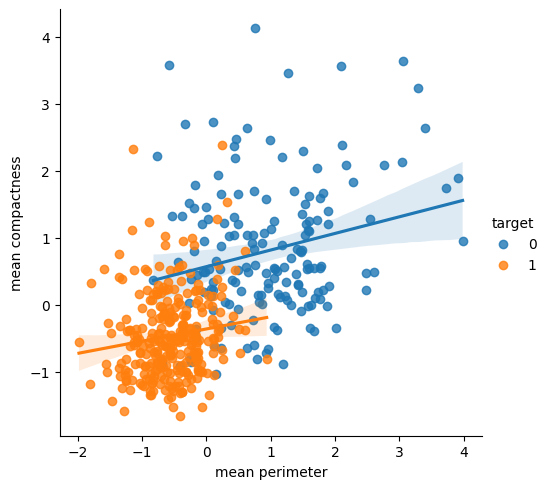

In [98]:
## Visualizing two features of the standardized data ##

ax = sns.lmplot(x='mean perimeter', y='mean compactness', hue='target', data=df_train)

plt.show()

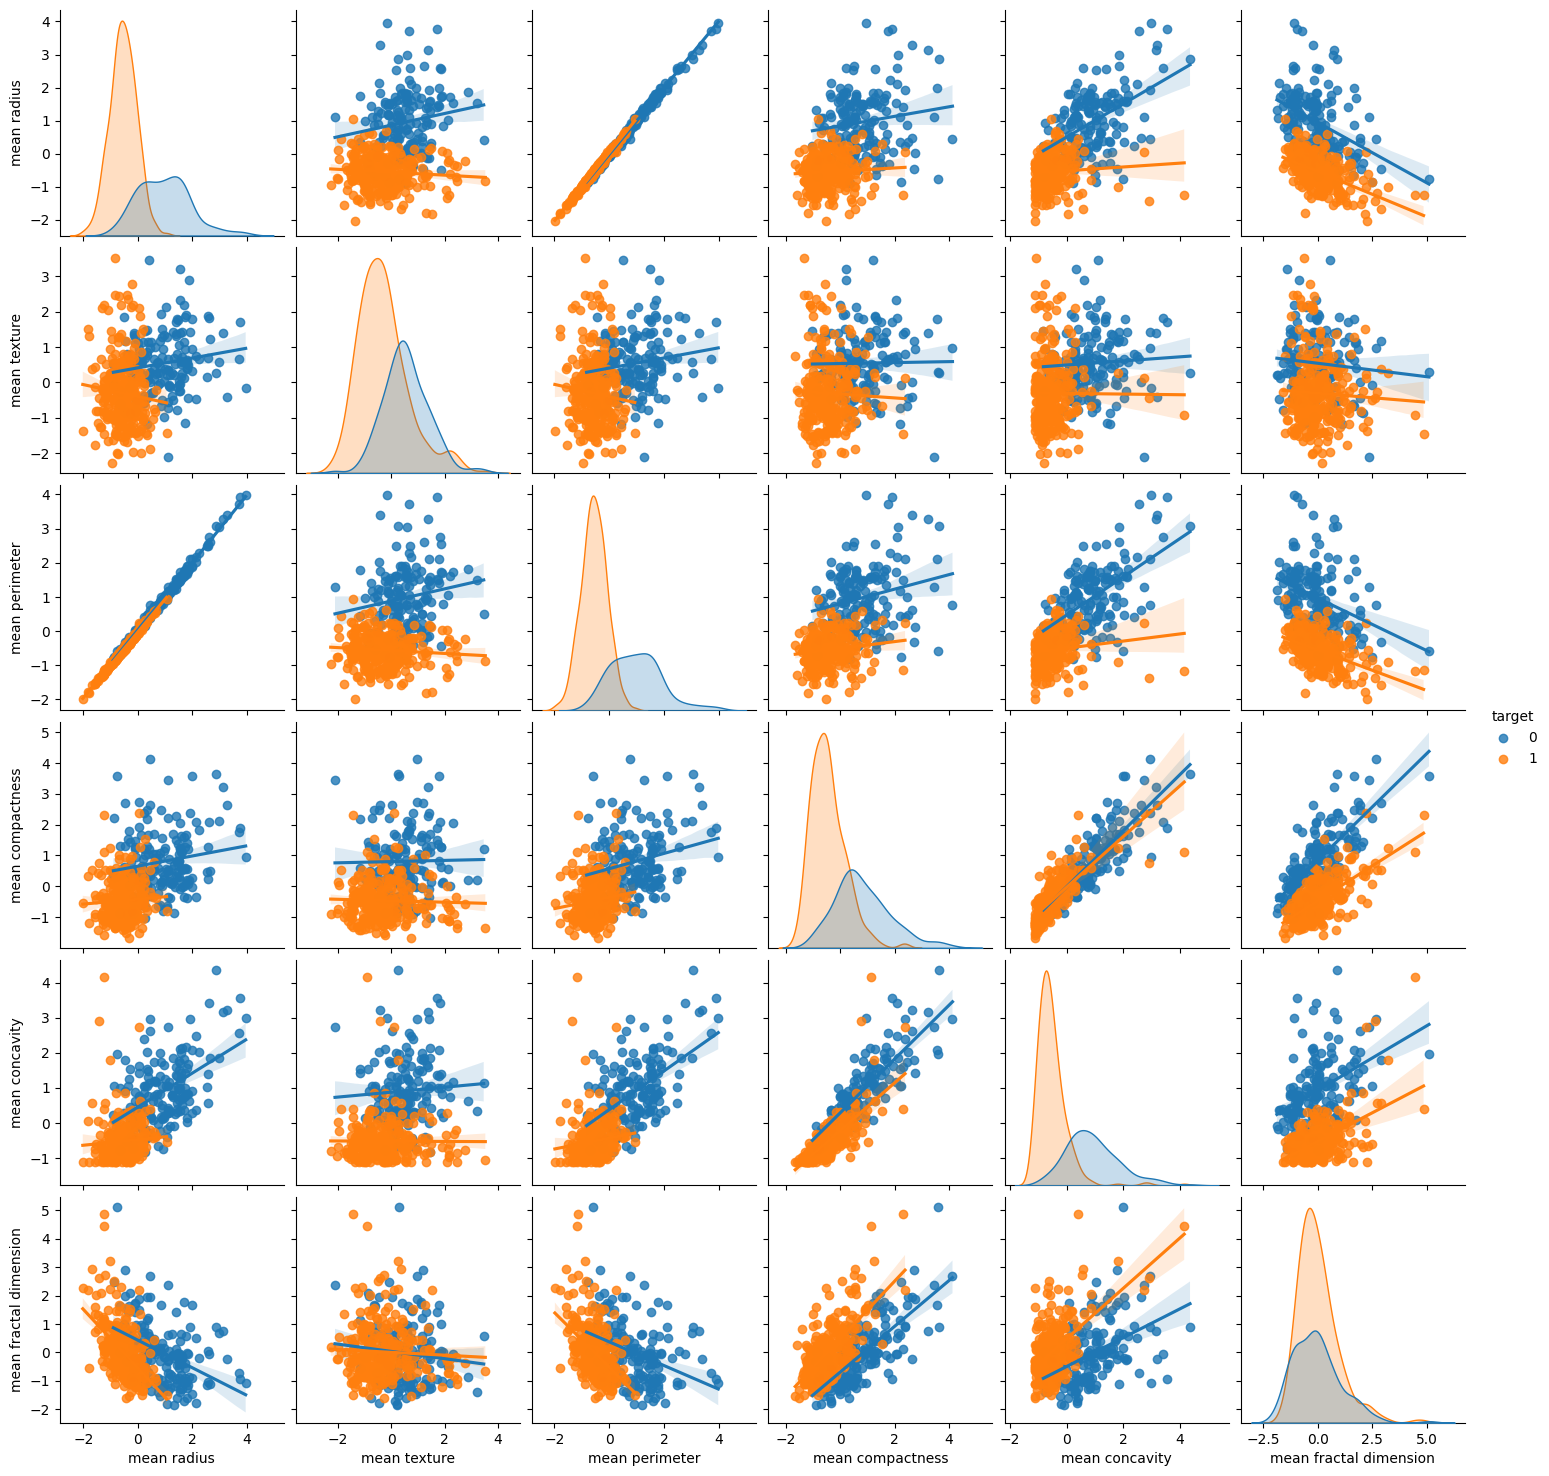

In [99]:
## Visualizing pairplots for multiple features of the standardized data ##

sns.pairplot(df_train[['mean radius', 'mean texture', 'mean perimeter', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'target']], hue='target', kind='reg')
plt.show()

# Part 2: Using All Features

In [100]:
## KNN without cross-validation

def KNN_without_CV(N_neighbors, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  '''

  test_scores = []  # To save test scores for different number of neighbors in KNN

  for i in N_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)  # Create KNN classifier
    knn.fit(X_train, y_train)  # Train the model using the training set

    # Method 1: Calculating accuracy using accuracy_score
    # y_pred = knn.predict(X_test)  # Predict the response for test dataset
    # test_score = accuracy_score(y_test, y_pred)
    # test_scores.append(test_score)
    # print('K = {}, Test accuracy : {} or approximately {}%'.format(i, test_score, int(round(test_score*100))))  # Model accuracy

    # Method 2: Calculating accuracy using knn.score
    test_score = knn.score(X_test, y_test)
    test_scores.append(test_score)
    # print('K = {}, Test accuracy : {} or approximately {}% \n'.format(i, test_score, int(round(test_score*100))))  # Model accuracy

  max_test_score = max(test_scores)
  K_opt = N_neighbors[test_scores.index(max_test_score)]

  return max_test_score, K_opt, test_scores



The best test score for KNN without cross-validation and without feature seletion/extraction is 0.9736842105263158 which is for K=16 number of neighbors. 




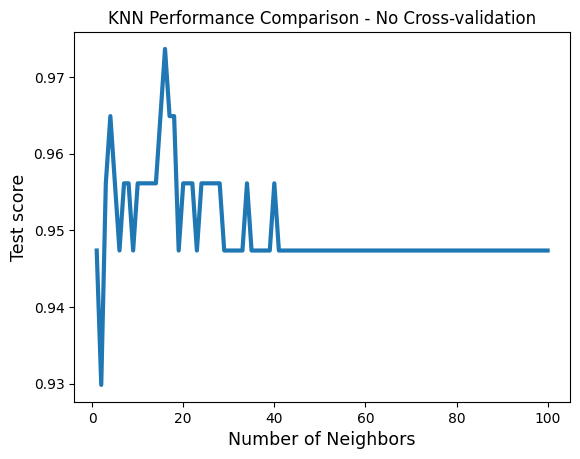

In [101]:
## Plot test scores for different number of neighbours without cross-validation ##

N_neighbors = np.arange(1, 101, 1)  # Array of neighbors
max_test_score, K_opt, test_scores = KNN_without_CV(N_neighbors, X_train, X_test, y_train, y_test)

print('The best test score for KNN without cross-validation and without feature seletion/extraction is {} which is for K={} number of neighbors. \n\n'.format(max_test_score, K_opt))

plt.plot(N_neighbors, test_scores, linewidth = 3)
plt.xlabel('Number of Neighbors', fontsize=12.5)
plt.ylabel('Test score', fontsize=12.5)
plt.title('KNN Performance Comparison - No Cross-validation', fontsize=12)
plt.show()

In [102]:
## KNN with k-fold cross-validation

def KNN_with_CV(N_neighbors, cv, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  cv: number of folds in cross-validation
  '''

  mean_cv_scores = []  # For saving the average of cross-validation scores

  for i in N_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)  # Create KNN classifier
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')  # scoring, if None the estimator’s default scorer (if available) is used
    scores_mean = scores.mean()
    mean_cv_scores.append(scores_mean)

    # print('K = {}'.format(i))
    # print('Scores = {}'.format(scores))
    # print('Average score = {} or approximately {}%\n'.format(scores_mean, int(round(scores_mean*100))))

  max_cv_score = max(mean_cv_scores)  # The best cross-validation score
  K_opt = N_neighbors[mean_cv_scores.index(max_cv_score)]  # Number of neighbors for the best cross-validation score
  test_score, _, _ = KNN_without_CV([K_opt], X_train, X_test, y_train, y_test)  # Finding the test score based on the best number of neighbors found using cross-validation

  return max_cv_score, K_opt, mean_cv_scores, test_score

The best number of neighbors for KNN based on 5-fold cross-validation and without feature seletion/extraction is K=5 for which cross-validation score is 0.9648351648351647 and the test score is 0.956140350877193. 




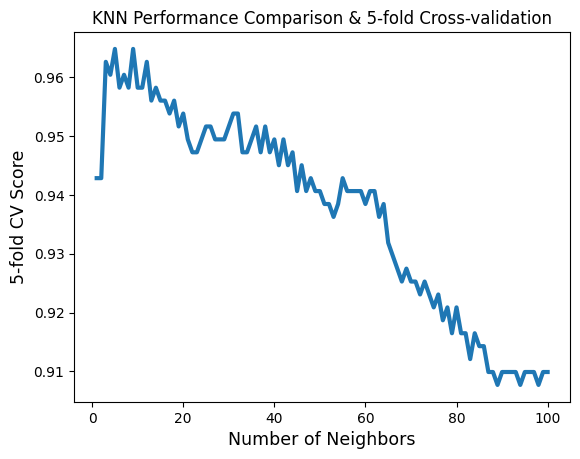

In [103]:
## Plot cross-validation scores for different number of neighbours ##

cv = 5  # Number of folds in cross-validation
max_cv_score, K_opt, mean_cv_scores, test_score = KNN_with_CV(N_neighbors, cv, X_train, X_test, y_train, y_test)  # Finding the best number of neighbors based on the best cross-validation score

print('The best number of neighbors for KNN based on {}-fold cross-validation and without feature seletion/extraction is K={} for which cross-validation score is {} and the test score is {}. \n\n'.format(cv, K_opt, max_cv_score, test_score))

plt.plot(N_neighbors, mean_cv_scores, linewidth = 3)
plt.xlabel('Number of Neighbors', fontsize=12.5)
plt.ylabel('{}-fold CV Score'.format(cv), fontsize=12.5)
plt.title('KNN Performance Comparison & {}-fold Cross-validation'.format(cv), fontsize=12)
plt.show()

##KNN with cross-validation using GridSearchCV

In [104]:
## KNN with k-fold cross-validation using GridSearchCV ##

def KNN_GridSearch(N_neighbors, cv, X_train, X_test, y_train, y_test):
  '''
  N_neighbors: array of number of neighbors
  cv: number of folds in cross-validation
  '''

  knn = KNeighborsClassifier()  # Create KNN classifier
  param_grid = {'n_neighbors': N_neighbors}  # Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
  GridSearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  # Using GridSearchCV for cross-validation
  GridSearch.fit(X_train, y_train)  # Train the model using the training set

  ## All the cross-validation scores, optimum number of neighbors and test score for that is calculated using GridSearchCV ##

  mean_cv_scores = GridSearch.cv_results_['mean_test_score']  # Average of cross-validation scores
  max_cv_score = GridSearch.best_score_  # The best cross-validation score
  K_opt = GridSearch.best_params_['n_neighbors']  # Number of neighbors for the best cross-validation score
  test_score = GridSearch.score(X_test, y_test)  # Finding the test score based on the best number of neighbors found using cross-validation

  return max_cv_score, K_opt, mean_cv_scores, test_score

The best number of neighbors for KNN based on 5-fold cross-validation and without feature seletion/extraction is K=5 for which cross-validation score is 0.9648351648351647 and the test score is 0.956140350877193. 




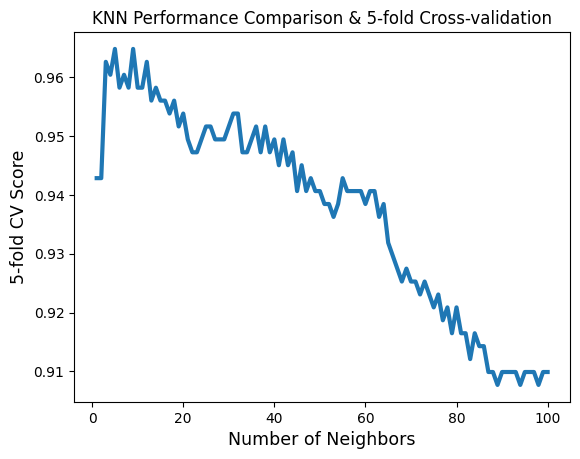

In [105]:
## Plot cross-validation scores for different number of neighbours using GridSearchCV ##

max_cv_score, K_opt, mean_cv_scores, test_score = KNN_GridSearch(N_neighbors, cv, X_train, X_test, y_train, y_test)

print('The best number of neighbors for KNN based on {}-fold cross-validation and without feature seletion/extraction is K={} for which cross-validation score is {} and the test score is {}. \n\n'.format(cv, K_opt, max_cv_score, test_score))

plt.plot(N_neighbors, mean_cv_scores, linewidth = 3)
plt.xlabel('Number of Neighbors', fontsize=12.5)
plt.ylabel('{}-fold CV Score'.format(cv), fontsize=12.5)
plt.title('KNN Performance Comparison & {}-fold Cross-validation'.format(cv), fontsize=12)
plt.show()

#Feature Selection

In [114]:
## Function to create heatmap of correlation between columns of df ##

def Heatmap(df):

  Correlation = df.corr()

  mask = np.triu(np.ones_like(Correlation, dtype=bool))  # Use bool instead of np.bool
  cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Generate a custom diverging colormap

  with sns.axes_style('white'):
    ax = plt.figure(figsize=(.9*len(Correlation), .5*len(Correlation)))
    ax = sns.heatmap(Correlation, mask=mask, cmap=cmap, linewidths=.5, annot=True) #, annot_kws={'size': 24})

    _, xlabels = plt.xticks()
    ax.set_xticklabels(xlabels, size=11.5)
    _, ylabels = plt.yticks()
    ax.set_yticklabels(ylabels, size=11.5)

In [116]:
## Create a datafram (including only the training data) for feature section ##

df_train = pd.concat([X_train.set_index(y_train.index), y_train], axis=1)  # The set_index command is used to make sure index of X_train is the same as y_train

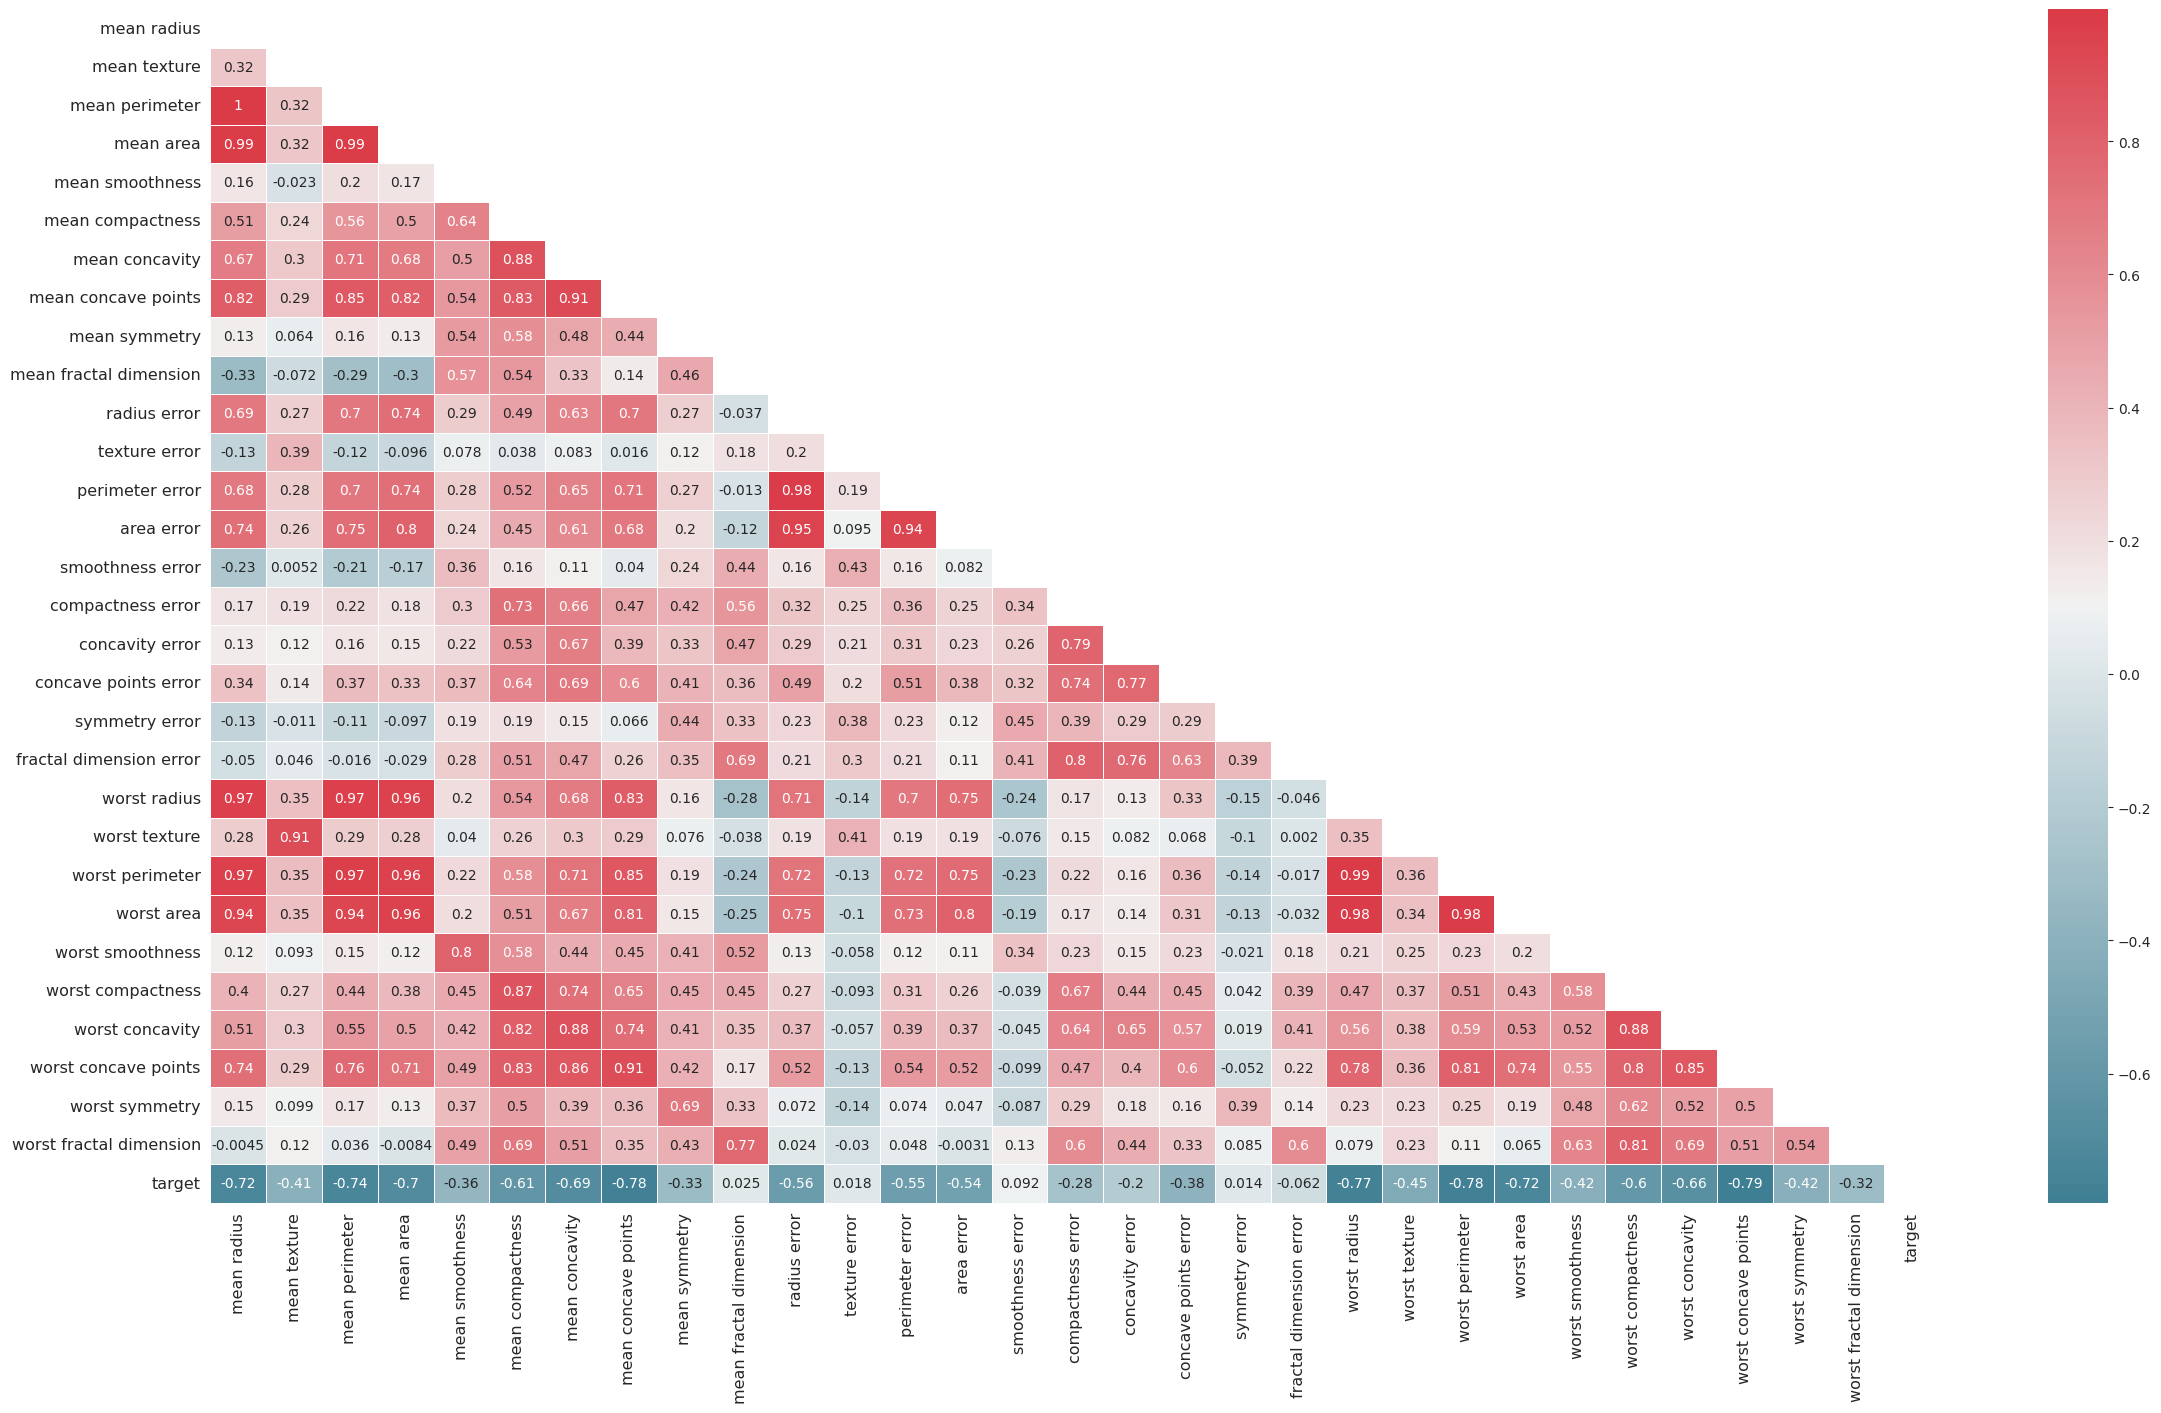

In [117]:
Heatmap(df_train)

In [118]:
## Function for feature selection based on correlation ##
## First, features are ordered based on correlation with target variable ##
## Then, from each two features which are highly correlated the one with lower correlation with the target is dropped ##

def OrderCorr(df, target, threshold1=0, threshold2=0.9):
  '''
  df: dataframe
  target: target variable
  threshold1: correlation between each remaining feature and the target must be larger than this threshold
  threshold2: if correlation between each two feature is larger than this threshold one of them (the one with lower correlation with the target) is dropped
  '''

  Correlation = df.corr()  # Correlation dataframe

  # Ordering features based on correlation with the target #

  Correlation['target abs'] = Correlation[target].abs()  # Absolute value of target in a new column
  Correlation.sort_values(by='target abs', ascending=False, inplace=True)  # Sorting the dataframe based on the absolute value of correlation with target
  Corr_with_target = Correlation[[target]]  # A new dataframe including only 'target'
  Corr_with_target.drop([target], inplace=True)  # Eliminating unnecessary rows

  # Dropping features with smaller correlation with the target #

  Corr_with_target1 = Corr_with_target.copy()  # Creating a copy of dataframe
  Corr_with_target1 = Corr_with_target1[abs(Corr_with_target1[target]) > threshold1]

  # Dropping one of each two highly correlated features #

  for i, feature1 in enumerate(Corr_with_target.index):
    for feature2 in Corr_with_target.index[i+1:]:
      if (feature1 and feature2) in Corr_with_target1.index and abs(Correlation.loc[feature1, feature2]) > threshold2:
        Corr_with_target1.drop([feature2], inplace=True)  # Eliminating unnecessary rows

  Corr_with_target1.rename(columns={target: 'Correlation with ' + target}, inplace=True)
  print(Corr_with_target1.to_string(justify='center'))  # Displaying the selected features and their correlation with the target

  return Corr_with_target1

In [119]:
Corr_with_target = OrderCorr(df_train, target='target', threshold1=0.37, threshold2=0.9)

                      Correlation with target
worst concave points        -0.793440        
worst perimeter             -0.775844        
worst concavity             -0.655823        
mean compactness            -0.612290        
worst compactness           -0.598603        
radius error                -0.562805        
worst texture               -0.452060        
worst smoothness            -0.420424        
worst symmetry              -0.417622        
concave points error        -0.382164        


In [120]:
X_train = X_train[Corr_with_target.index].set_index(y_train.index)  # Creating a new X_train including only the selected features
X_test = X_test[Corr_with_target.index].set_index(y_test.index)  # Creating a new X_test including only the selected features

In [121]:
## Create a datafram (including only the training data) for feature section ##

df_train = pd.concat([X_train.set_index(y_train.index), y_train], axis=1)

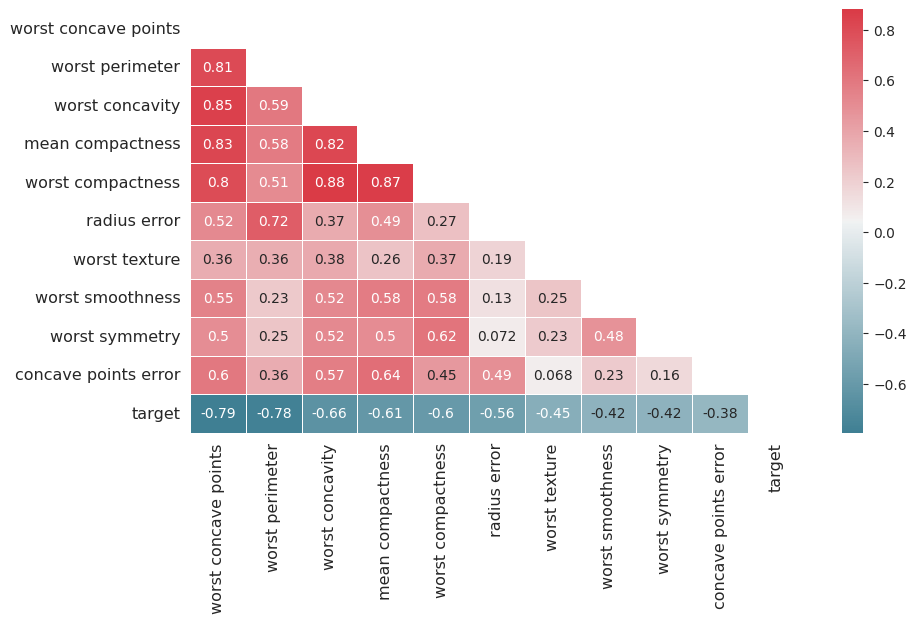

In [122]:
Heatmap(df_train)